In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
sns.set_theme()

In [25]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [26]:
fmri.describe()

,timepoint,signal
count,1064.000000,1064.000000
mean,9.000000,0.003540
std,5.479801,0.093930
min,0.000000,-0.255486
25%,4.000000,-0.046070
50%,9.000000,-0.013653
75%,14.000000,0.024293
max,18.000000,0.564985


In [27]:
fmri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    1064 non-null   object 
 1   timepoint  1064 non-null   int64  
 2   event      1064 non-null   object 
 3   region     1064 non-null   object 
 4   signal     1064 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


Text(0, 0.5, 'Signal change')

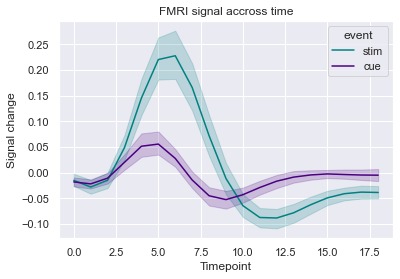

In [28]:
sns.lineplot(x="timepoint", y="signal", hue="event", palette=["teal", "indigo"], data=fmri)
plt.title("FMRI signal accross time")
plt.xlabel("Timepoint")
plt.ylabel("Signal change")

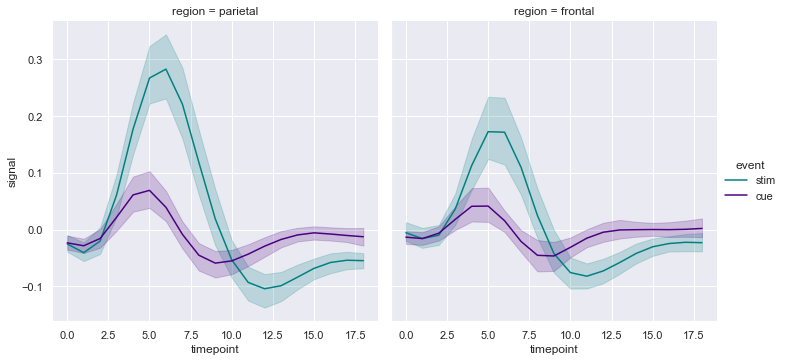

In [29]:
sns.relplot(x="timepoint", y="signal", col="region", hue="event", palette=["teal", "indigo"], kind="line", data=fmri)

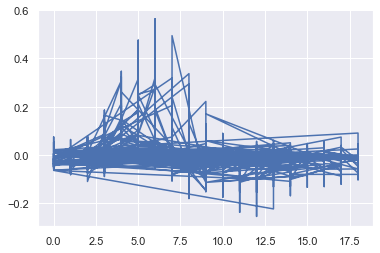

In [30]:
plt.plot(fmri.timepoint, fmri.signal)

In [31]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [32]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [33]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


<AxesSubplot:xlabel='day', ylabel='total_bill'>

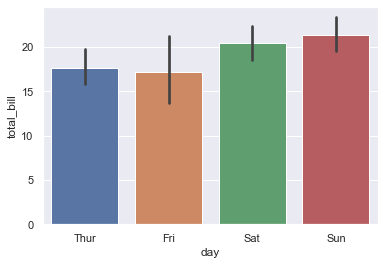

In [34]:
sns.barplot(x="day", y="total_bill", data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

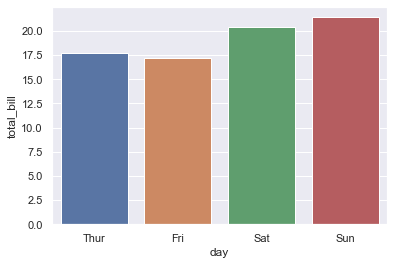

In [35]:
sns.barplot(x="day", y="total_bill", data=tips, ci=None)

<AxesSubplot:xlabel='total_bill', ylabel='day'>

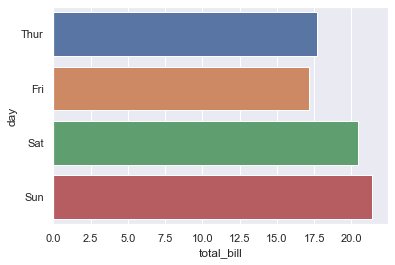

In [36]:
sns.barplot(x="total_bill", y="day", data=tips, ci=None)

<BarContainer object of 244 artists>

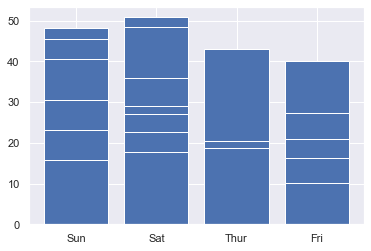

In [37]:
plt.bar(tips.day, tips.total_bill)

In [44]:
male = tips[tips['sex'] == 'Male']
female = tips[tips['sex'] == 'Female']

mday = male.groupby('day').mean()
fday = female.groupby('day').mean()

totals = mday.merge(fday, right_index=True, left_index=True)

totals['total'] = totals['tip_x'] + totals['tip_y']

totals['prop_m'] = np.true_divide(totals['tip_x'],totals['total']) * 100
totals['prop_f'] = np.true_divide(totals['tip_y'],totals['total']) * 100

totals

,total_bill_x,tip_x,size_x,total_bill_y,tip_y,size_y,total,prop_m,prop_f
day,,,,,,,,,
Thur,18.714667,2.980333,2.433333,16.715312,2.575625,2.468750,5.555958,53.642111,46.357889
Fri,19.857000,2.693000,2.100000,14.145556,2.781111,2.111111,5.474111,49.195202,50.804798
Sat,20.802542,3.083898,2.644068,19.680357,2.801786,2.250000,5.885684,52.396600,47.603400
Sun,21.887241,3.220345,2.810345,19.872222,3.367222,2.944444,6.587567,48.885192,51.114808


<BarContainer object of 4 artists>

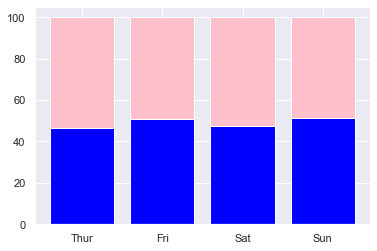

In [52]:
plt.bar(totals.index, totals.prop_m, label='Male', color='pink', bottom=totals.prop_f)
plt.bar(totals.index, totals.prop_f, label='Female', color='blue')

In [53]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [54]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [55]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


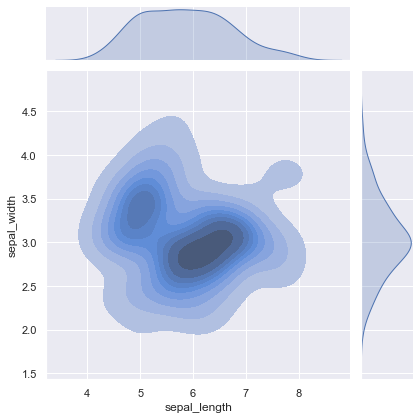

In [70]:
sns.jointplot(x=iris['sepal_length'], y=iris['sepal_width'], kind='kde', fill=True, space=0.2)

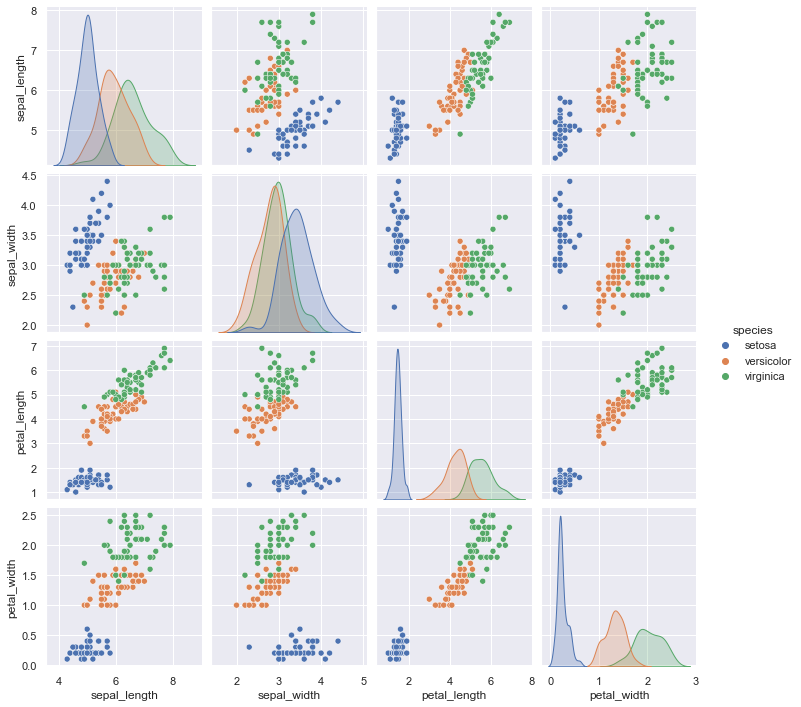

In [61]:
sns.pairplot(iris, hue='species')

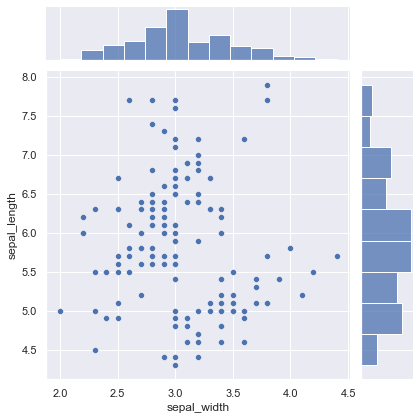

In [72]:
sns.jointplot(x='sepal_width', y='sepal_length', data=iris)